In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:/Users/navne/Desktop/archive (1)/Dataset.csv")

# EDA - Data Preparation and Visualization

# 1. Data Prep

In [3]:
df.shape

(1725, 23)

In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'year', 'brand', 'full_model_name', 'model_name',
       'price', 'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age', 'distance below 30k km', 'new and less used',
       'inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand',
       'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1',
       'best_buy2'],
      dtype='object')

In [5]:
df.head(3)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.0
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.0
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.0


In [6]:
df.drop(['Unnamed: 0','inv_car_price','inv_car_dist','inv_car_age','inv_brand','std_invprice','std_invdistance_travelled',
         'std_invrank','best_buy1','best_buy2'],axis=1,inplace=True)

In [7]:
df.shape

(1725, 13)

In [8]:
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,1,0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,0,0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,0,0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0,1,1
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0,1,0


In [9]:
def handledist(x):
    if x==1:
        return 'less than 30k km'
    elif x==0:
        return 'more than 30k km'

In [10]:
df['below 30k km'] = df['distance below 30k km'].apply(handledist)

In [11]:
df.head(3)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,below 30k km
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,1,0,less than 30k km
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,0,0,more than 30k km
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,0,0,more than 30k km


In [12]:
df.drop(["distance below 30k km","new and less used"],axis=1,inplace=True)

In [13]:
df.head(3)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,below 30k km
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,less than 30k km
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,more than 30k km
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,more than 30k km


In [14]:
round(df.describe(),0)

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.0,1725.0,1725.0,1725.0,1725.0,1725.0
mean,862.0,2015.0,1494837.0,53848.0,16.0,6.0
std,498.0,3.0,1671658.0,44726.0,13.0,3.0
min,0.0,1990.0,62500.0,350.0,1.0,0.0
25%,431.0,2013.0,545000.0,29000.0,5.0,3.0
50%,862.0,2016.0,875000.0,49000.0,14.0,5.0
75%,1293.0,2018.0,1825000.0,70500.0,24.0,8.0
max,1724.0,2021.0,14700000.0,790000.0,81.0,31.0


In [15]:
df.isnull().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
below 30k km               0
dtype: int64

In [16]:
#fixing the outliers
brand = df['brand'].value_counts()
brand

Hyundai             297
Maruti Suzuki       275
Honda               153
Mercedes-Benz       131
Toyota              117
BMW                 111
Audi                 98
Mahindra             93
Ford                 78
Volkswagen           70
Renault              51
Skoda                45
Tata                 44
Jaguar               30
Land Rover           28
Volvo                17
Nissan               13
Kia                  12
MG                   10
MINI                 10
Jeep                 10
Chevrolet             9
Porsche               5
Mitsubishi            4
Bentley               3
Datsun                3
Lexus                 2
Lamborghini           2
Fiat                  2
Isuzu                 1
Mahindra-Renault      1
Name: brand, dtype: int64

In [17]:
lessthan_10 = brand[brand < 10]

In [18]:
def handlebrand(x):
    for i in brand:
        
        if x in lessthan_10:
            return 'others'
        else:
            return x

In [19]:
df['brand'] = df['brand'].apply(handlebrand)

In [20]:
df['model_name'].value_counts()

Creta      71
Innova     69
City       68
Swift      58
XUV500     46
           ..
Altroz      1
Civic       1
G-Class     1
MU-X        1
Jeep        1
Name: model_name, Length: 169, dtype: int64

In [21]:
df['full_model_name'].value_counts()

Ford EcoSport Titanium 1.5L TDCi                 12
Toyota Innova Crysta 2.4 VX 8 STR [2016-2020]    11
Audi Q7 3.0 TDI quattro Premium Plus             11
Honda City 1.5 S MT                              11
Volkswagen Polo GT TSI                           11
                                                 ..
Jaguar XF Portfolio Diesel                        1
Land Rover Range Rover 4.4 SDV8 Vogue SE          1
Maruti Suzuki Celerio ZXi [2017-2019]             1
BMW 3 Series 325i Sedan                           1
Hyundai Creta SX Plus 1.6 AT CRDI                 1
Name: full_model_name, Length: 750, dtype: int64

In [22]:
loc = df['city'].value_counts()

In [23]:
lessthan10 = loc[loc<10]

In [24]:
def handleloc(x):
    if x in lessthan10:
        return 'others'
    else:
        return x

In [25]:
df['city'] = df['city'].apply(handleloc)

In [26]:
df['city'].value_counts()

Chennai      493
Bangalore    247
Pune         247
Hyderabad    245
Delhi        187
Mumbai       165
Dehradun      56
Thane         48
others        15
Noida         12
Ghaziabad     10
Name: city, dtype: int64

In [27]:
mn = df['model_name'].value_counts()

In [28]:
modelless3 = mn[mn<3]

In [29]:
def handlename(x):
    if x in modelless3:
        return 'others'
    else:
        return x

In [30]:
df['model_name'] = df['model_name'].apply(handlename)

In [31]:
df['model_name'].value_counts()

Creta      71
others     69
Innova     69
City       68
Swift      58
           ..
Cross       3
Fluidic     3
BR-V        3
Jetta       3
Ignis       3
Name: model_name, Length: 118, dtype: int64

In [32]:
ft = df['fuel_type'].value_counts()
ft

Diesel        922
Petrol        788
CNG + 1         8
Petrol + 1      6
Hybrid          1
Name: fuel_type, dtype: int64

In [33]:
ftlessthan10 = ft[ft<10]

In [34]:
def handleft(x):
    if x in ftlessthan10:
        return 'others'
    else:
        return x

In [35]:
df['fuel_type'] = df['fuel_type'].apply(handleft)

In [36]:
df['fuel_type'].value_counts()

Diesel    922
Petrol    788
others     15
Name: fuel_type, dtype: int64

In [37]:
df.head(3)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,below 30k km
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,less than 30k km
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,more than 30k km
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,more than 30k km


# 2. Visualization

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

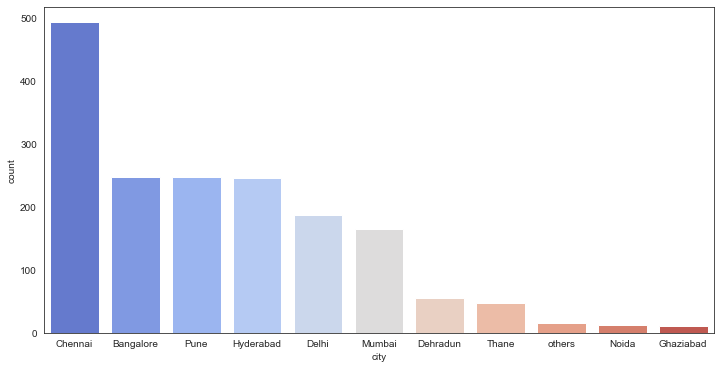

In [38]:
sns.set_style('white')
plt.figure(figsize = (12,6))
sns.countplot(df['city'],order = df['city'].value_counts().index,palette = 'coolwarm')

<AxesSubplot:xlabel='car_age', ylabel='Count'>

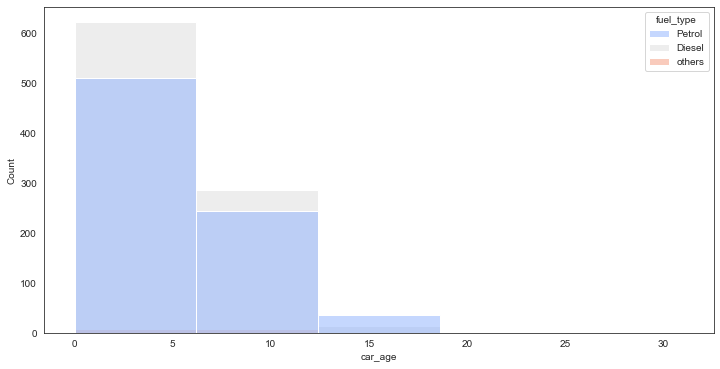

In [39]:
plt.figure(figsize = (12,6))
sns.histplot(data=df,x = 'car_age',bins=5,hue='fuel_type',palette='coolwarm',legend=True)

<AxesSubplot:xlabel='year', ylabel='car_age'>

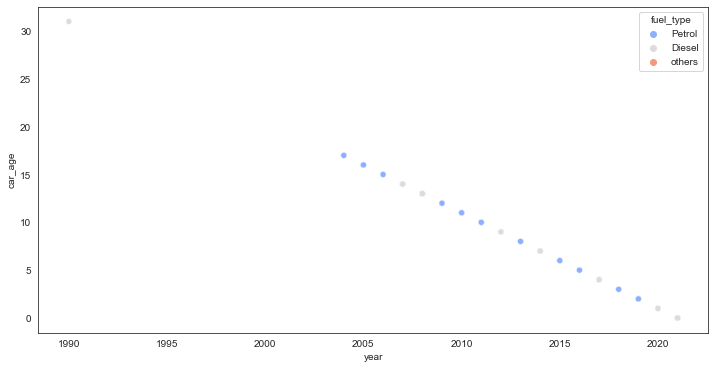

In [40]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df,x='year',y='car_age',hue='fuel_type',palette='coolwarm')

<Figure size 1080x1080 with 0 Axes>

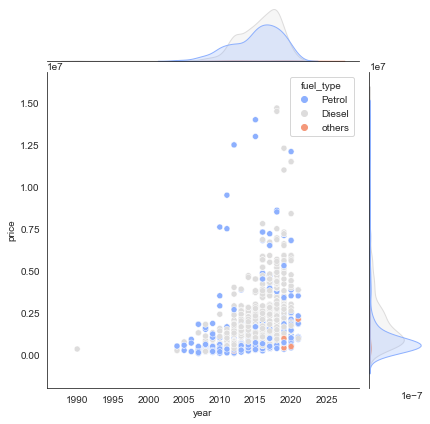

In [41]:
plt.figure(figsize = (15,15))
sns.jointplot(data = df,x='year',y='price',hue='fuel_type',palette='coolwarm')

<Figure size 576x576 with 0 Axes>

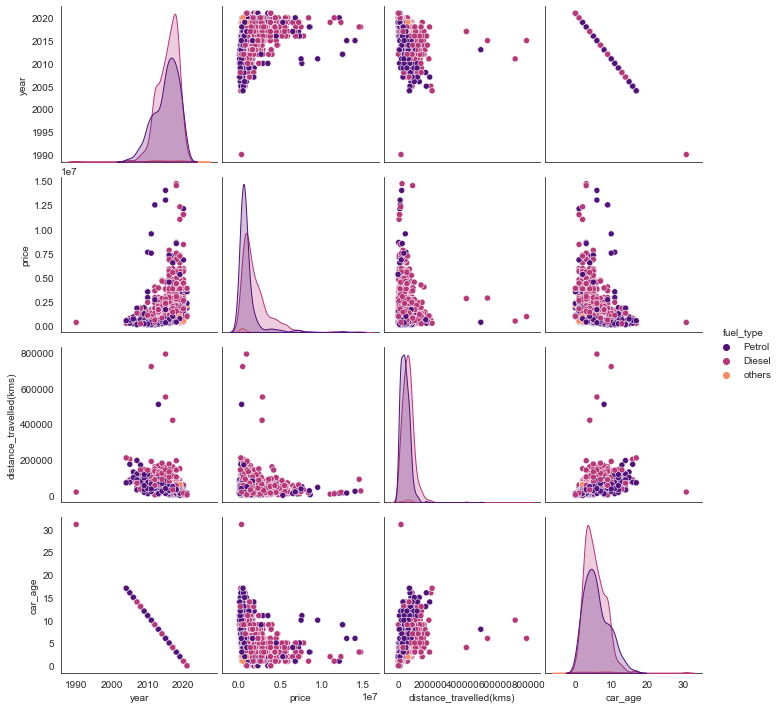

In [42]:
plt.figure(figsize=(8,8))
sns.pairplot(df,vars=['year','price','distance_travelled(kms)','car_age'],hue='fuel_type',palette='magma')

In [43]:
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,below 30k km
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,less than 30k km
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,more than 30k km
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,more than 30k km
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0,less than 30k km
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0,less than 30k km


In [44]:
df1 = pd.pivot_table(data=df,index='fuel_type',columns='below 30k km',values='car_age',aggfunc=np.mean)
df1

below 30k km,less than 30k km,more than 30k km
fuel_type,,
Diesel,2.859649,6.000000
Petrol,3.501718,7.203219
others,1.000000,6.583333


Text(52.0, 0.5, 'FUEL TYPE')

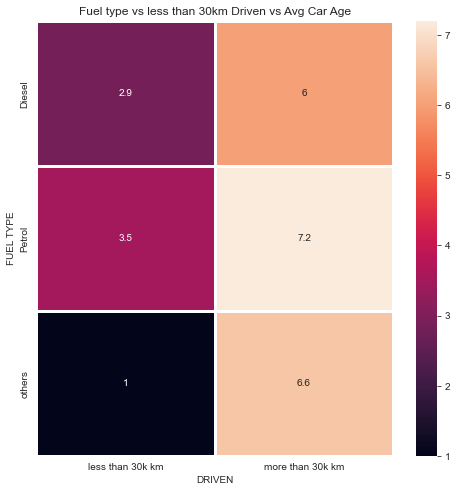

In [45]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(data = df1,annot=True,linecolor='white',linewidths=3)
hm.set_title('Fuel type vs less than 30km Driven vs Avg Car Age')
hm.set_xlabel('DRIVEN')
hm.set_ylabel('FUEL TYPE')

<Figure size 576x576 with 0 Axes>

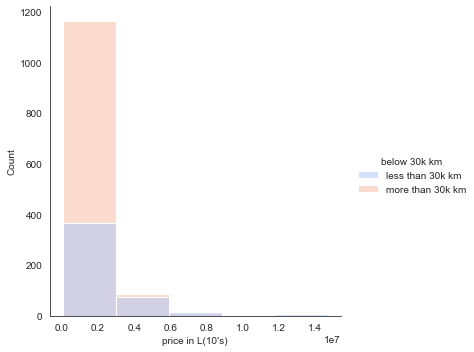

In [46]:
plt.figure(figsize=(8,8))
p = sns.displot(data=df,x=df['price'],bins=5,hue='below 30k km',palette='coolwarm')
p.set_xlabels("price in L(10's)")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Honda'),
  Text(1, 0, 'Nissan'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Maruti Suzuki'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Skoda'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Tata'),
  Text(11, 0, 'Audi'),
  Text(12, 0, 'others'),
  Text(13, 0, 'Ford'),
  Text(14, 0, 'Mahindra'),
  Text(15, 0, 'Jaguar'),
  Text(16, 0, 'MINI'),
  Text(17, 0, 'Land Rover'),
  Text(18, 0, 'Jeep'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'MG'),
  Text(21, 0, 'Kia')])

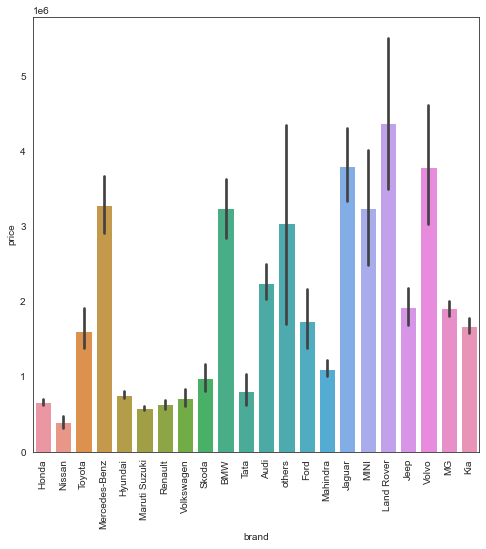

In [47]:
plt.figure(figsize=(8,8))
fg = sns.barplot(data=df, x='brand',y='price')
plt.xticks(rotation=90)

In [48]:
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,below 30k km
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0,less than 30k km
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0,more than 30k km
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0,more than 30k km
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0,less than 30k km
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0,less than 30k km


Text(0.5, 1.0, 'Brand vs Pricing')

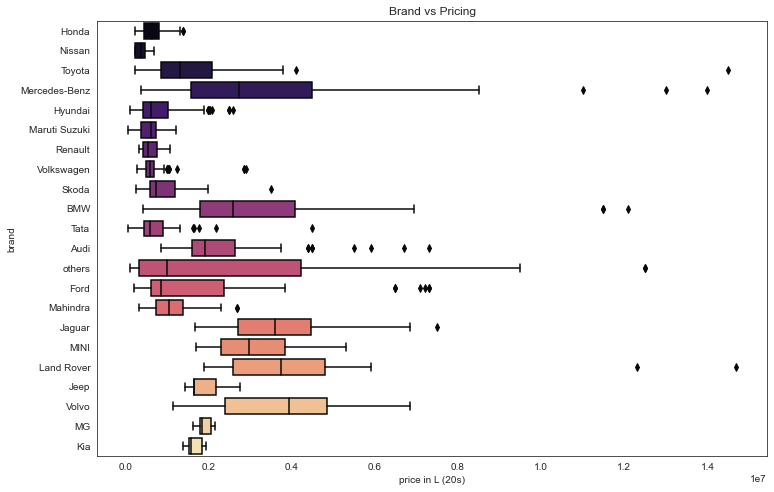

In [49]:
plt.figure(figsize=(12,8))
bp = sns.boxplot(data=df,x='price',y='brand',palette='magma')
bp.set_xlabel('price in L (20s)')
bp.set_title('Brand vs Pricing')

Text(0, 0.5, 'price in L (20s)')

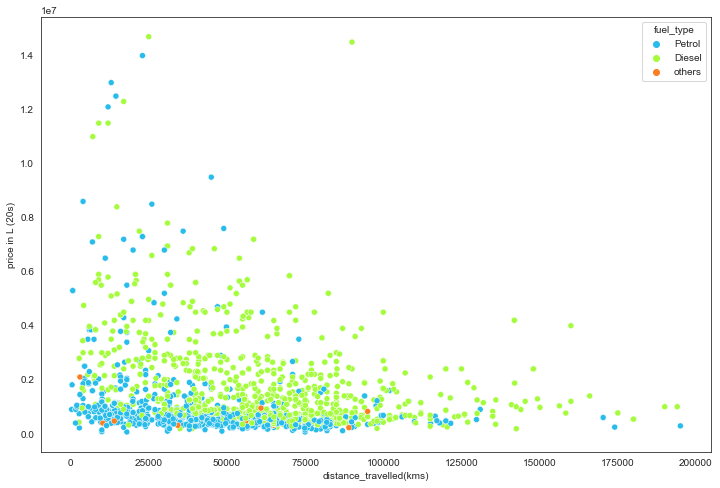

In [50]:
plt.figure(figsize=(12,8))
dist = df[df['distance_travelled(kms)']<200000] 
sp = sns.scatterplot(data=dist,x='distance_travelled(kms)',y='price',hue='fuel_type',palette='turbo') 
sp.set_ylabel('price in L (20s)')

<AxesSubplot:xlabel='city', ylabel='price'>

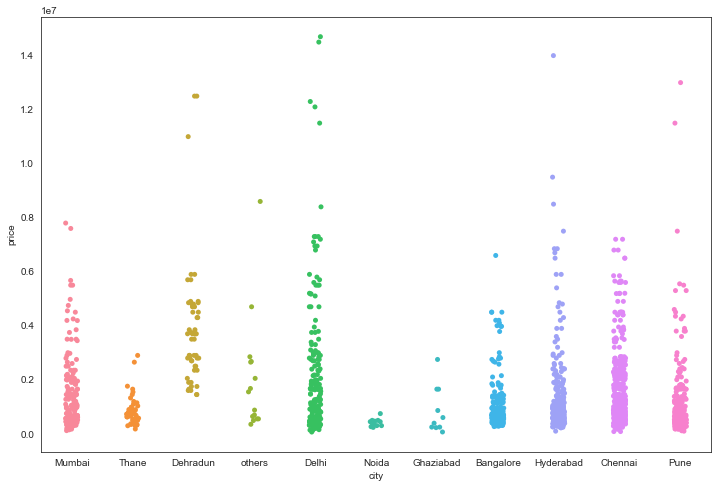

In [51]:
plt.figure(figsize=(12,8))
sns.stripplot(x="city", y="price", data=dist,jitter=True )

# thanks for watching!